# Decision Trees: Overfitting vs Generalization

This notebook explores how model complexity affects learning behavior in machine learning.

Using decision tree regression, I compare:
- An unrestricted tree that memorizes the training data
- A constrained tree that is forced to generalize
- A linear regression model as a simple baseline

The goal is to understand **why lower training error does not always mean a better model**.

## 1. Import Required Libraries

I use only commonly used machine learning libraries:
- Pandas and NumPy for data handling
- Scikit-learn for models and evaluation
- Matplotlib for visualization


In [ ]:
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

## 2. Dataset

I created a small synthetic dataset representing used car prices.

This dataset is intentionally small so that:
- Overfitting is easy to observe
- Model behavior is easier to reason about

Each row represents a single car, with its price as the target variable.

In [ ]:
data = {
    "Mileage": [50000, 120000, 20000, 80000, 15000, 95000, 30000, 60000, 150000, 5000, 110000, 45000],
    "Age_Years": [5, 10, 2, 7, 1, 8, 3, 6, 12, 1, 9, 4],
    "Horsepower": [150, 130, 250, 140, 200, 110, 180, 160, 100, 300, 120, 170],
    "Engine_Size_L": [2.0, 1.8, 3.5, 2.0, 2.5, 1.6, 2.2, 2.0, 1.5, 4.0, 1.8, 2.4],
    "Fuel_Efficiency_MPG": [28, 30, 18, 26, 24, 32, 25, 27, 35, 15, 29, 23],
    "Price": [15000, 6500, 35000, 11000, 28000, 7500, 22000, 13500, 4000, 55000, 7000, 19500]
}

df = pd.DataFrame(data)

X = df.drop("Price", axis=1)
y = df["Price"]

## 3. Train–Validation Split

Training error alone is not sufficient to evaluate a model.

I split the data into:
- Training set: used to fit the models
- Validation set: used to evaluate generalization performance


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.3, random_state=42
)

## 4. Model 1 — Unrestricted Decision Tree (Memorizer)

This model has no constraints on depth or splits.

As a result:
- It can keep splitting until each training sample is isolated
- It is expected to achieve very low training error
- It is likely to overfit


In [ ]:
memorizer = DecisionTreeRegressor(random_state=42)
memorizer.fit(X_train, y_train)

### Evaluation

I evaluate the model using Mean Absolute Error (MAE) on:
- Training data
- Validation data


In [ ]:
train_preds_mem = memorizer.predict(X_train)
val_preds_mem = memorizer.predict(X_val)

train_mae_mem = mean_absolute_error(y_train, train_preds_mem)
val_mae_mem = mean_absolute_error(y_val, val_preds_mem)

print("Unrestricted Decision Tree (Memorizer)")
print(f"Training MAE: ${train_mae_mem:.2f}")
print(f"Validation MAE: ${val_mae_mem:.2f}")


### Decision Tree Structure (Memorizer)

The following visualization shows how complex the unrestricted tree becomes.
Each leaf represents very specific decision paths.

In [ ]:
plt.figure(figsize=(20, 10))
plot_tree(
    memorizer,
    feature_names=X.columns,
    filled=True,
    rounded=True
)
plt.title("Unrestricted Decision Tree (Memorizer)")
plt.show()

## 5. Model 2 — Constrained Decision Tree (Learner)

This model limits complexity using:
- max_depth = 3
- min_samples_split = 4

These constraints prevent the tree from memorizing individual samples
and force it to learn broader patterns.


In [ ]:
learner = DecisionTreeRegressor(
    max_depth=3,
    min_samples_split=4,
    random_state=42
)

learner.fit(X_train, y_train)

### Evaluation

This model is expected to:
- Have higher training error than the memorizer
- Perform better on validation data


In [ ]:
train_preds_learner = learner.predict(X_train)
val_preds_learner = learner.predict(X_val)

train_mae_learner = mean_absolute_error(y_train, train_preds_learner)
val_mae_learner = mean_absolute_error(y_val, val_preds_learner)

print("Constrained Decision Tree (Learner)")
print(f"Training MAE: ${train_mae_learner:.2f}")
print(f"Validation MAE: ${val_mae_learner:.2f}")

### Decision Tree Structure (Learner)

The constrained tree is much smaller and easier to interpret.
It represents general rules instead of memorized cases.


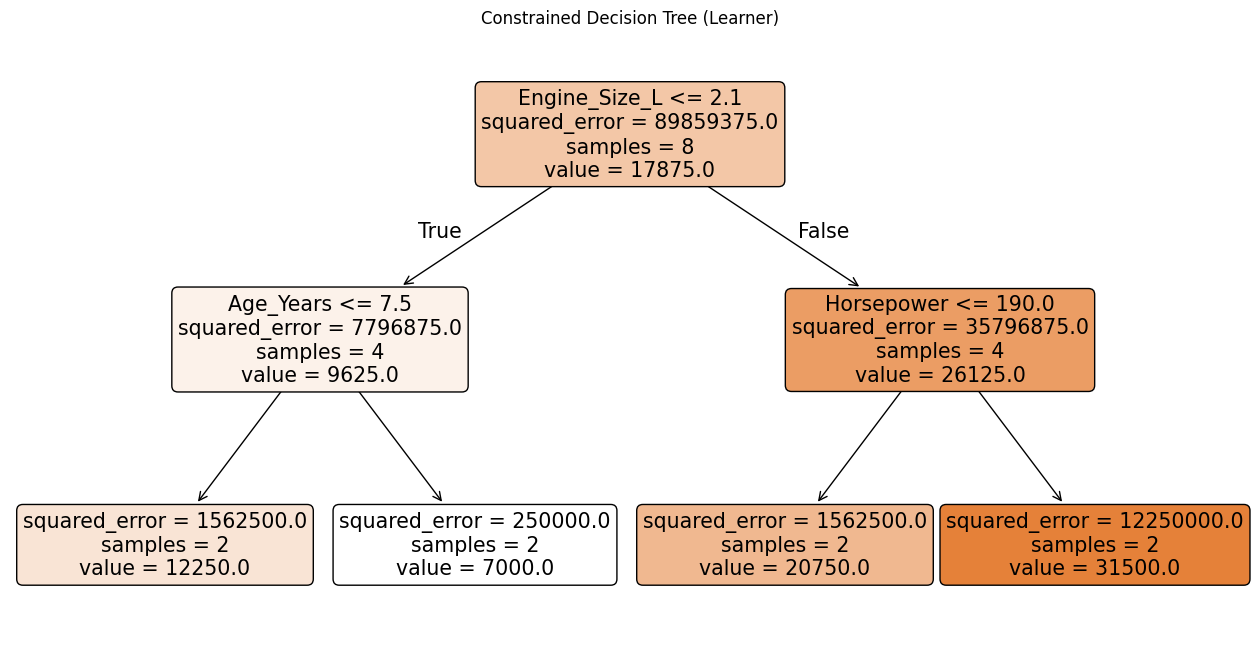

In [12]:
plt.figure(figsize=(16, 8))
plot_tree(
    learner,
    feature_names=X.columns,
    filled=True,
    rounded=True
)
plt.title("Constrained Decision Tree (Learner)")
plt.show()


## 6. Linear Regression (Baseline Model)

Linear regression serves as a simple, high-bias baseline.
It assumes a linear relationship between features and target.


In [ ]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

train_preds_lr = linear_model.predict(X_train)
val_preds_lr = linear_model.predict(X_val)

train_mae_lr = mean_absolute_error(y_train, train_preds_lr)
val_mae_lr = mean_absolute_error(y_val, val_preds_lr)

print("Linear Regression")
print(f"Training MAE: ${train_mae_lr:.2f}")
print(f"Validation MAE: ${val_mae_lr:.2f}")


## 7. Model Comparison

The table below summarizes the performance of all models.

In [ ]:
results = pd.DataFrame({
    "Model": [
        "Decision Tree (Memorizer)",
        "Decision Tree (Learner)",
        "Linear Regression"
    ],
    "Training MAE": [
        train_mae_mem,
        train_mae_learner,
        train_mae_lr
    ],
    "Validation MAE": [
        val_mae_mem,
        val_mae_learner,
        val_mae_lr
    ]
})

results


## 8. Conclusion

Key observations from this experiment:

- The unrestricted decision tree achieves near-zero training error but generalizes poorly.
- The constrained tree sacrifices training accuracy to achieve better validation performance.
- Linear regression provides a simple baseline with higher bias.

This experiment highlights the importance of controlling model complexity
and evaluating models on unseen data.
